# 人工知能講座 初級編
[【キカガク流】人工知能・機械学習 脱ブラックボックス講座 - 初級編 -](https://www.udemy.com/course/kikagaku_blackbox_1/)

## 単回帰分析：部屋の広さから家賃を予測しよう

## データを定義する

In [4]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([2, 3.9, 6.1])

## 中心化する

In [5]:
def centerize(values):
    return values - values.mean()

xc = centerize(x)
yc = centerize(y)

## パラメータ a の計算

In [6]:
xy = xc * yc
c1 = xy.sum()
c1

4.1

In [7]:
xx = xc * xc
c2 = xx.sum()
c2


2.0

In [8]:
a = c1/c2
a


2.05

## Pandas: データベースの操作

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('sample.csv')

In [7]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [9]:
# データの抽出
x = df['x']
y = df['y']

## Matplotlib : グラフの描画

In [10]:
import matplotlib.pyplot as plt

In [11]:
### 散布図をプロット。横軸x, 縦軸y

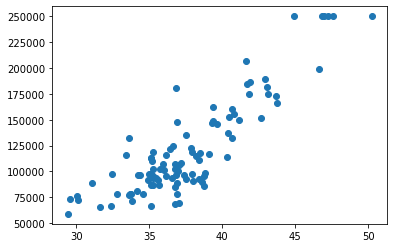

In [12]:
plt.scatter(x,y)
plt.show()

### データの中心化 (pandasを使う)

In [14]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [15]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [17]:
# 中心化
df_c = df - df.mean()
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [18]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,2.096101e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [20]:
# データの抽出
x = df_c['x']
y = df_c['y']

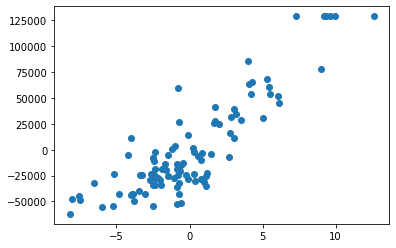

In [21]:
# x と ｙの散布図
plt.scatter(x,y)
plt.show()

## パラメータaの計算

In [25]:
xx = x * x # * は要素積
xy = x * y

In [27]:
a = xy.sum() / xx.sum()
a

10069.022519284063

## プロットして確認

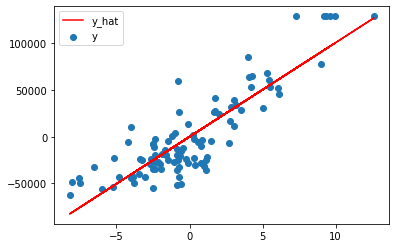

In [35]:
plt.scatter(x,y, label='y') #実測値
plt.plot(x, a*x, label='y_hat', color='red') # 予測値
plt.legend()
plt.show()

## 予測値の計算

In [37]:
x_new = 40 # 40平米の部屋

In [39]:
mean = df.mean()
mean

x        37.62222
y    121065.00000
dtype: float64

### 中心化

In [41]:
xc = x_new - mean['x']
xc

2.3777800000000013

In [43]:
# 単回帰分析による予測
yc = a * xc
yc

23941.920365903272

In [45]:
# 元のスケールの予測値
y_hat = yc + mean['y']
y_hat

145006.92036590326

### 予測値を計算する関数の作成

In [49]:
def predict(x, ):
    xc = x - mean['x']
    yc = a * xc
    y_hat = yc + mean['y']
    return y_hat

In [50]:
predict(40)

145006.92036590326

In [54]:
predict(25)  # 外挿のため安定した結果が得られない

-6028.417423357663

In [52]:
predict(70)

447077.59594442515